In [1]:
pip install pandas numpy matplotlib seaborn scikit-learn flask joblib

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd

# Load dataset
df = pd.read_csv("customer_support_tickets.csv")
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8469 entries, 0 to 8468
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticket ID                     8469 non-null   int64  
 1   Customer Name                 8469 non-null   object 
 2   Customer Email                8469 non-null   object 
 3   Customer Age                  8469 non-null   int64  
 4   Customer Gender               8469 non-null   object 
 5   Product Purchased             8469 non-null   object 
 6   Date of Purchase              8469 non-null   object 
 7   Ticket Type                   8469 non-null   object 
 8   Ticket Subject                8469 non-null   object 
 9   Ticket Description            8469 non-null   object 
 10  Ticket Status                 8469 non-null   object 
 11  Resolution                    2769 non-null   object 
 12  Ticket Priority               8469 non-null   object 
 13  Tic

In [3]:
# Drop columns with too many missing values
df.drop(columns=['Customer Email'], inplace=True)

# Fill missing values in numerical columns
df['Customer Age'].fillna(df['Customer Age'].median(), inplace=True)
df['Customer Satisfaction Rating'].fillna(df['Customer Satisfaction Rating'].mean(), inplace=True)

In [4]:
df['Date of Purchase'] = pd.to_datetime(df['Date of Purchase'])

In [5]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = ['Ticket Type', 'Ticket Status', 'Ticket Priority', 'Ticket Channel']
encoder = LabelEncoder()
for col in categorical_cols:
    if df[col].dtype == 'object':
        df[col] = encoder.fit_transform(df[col].astype(str))

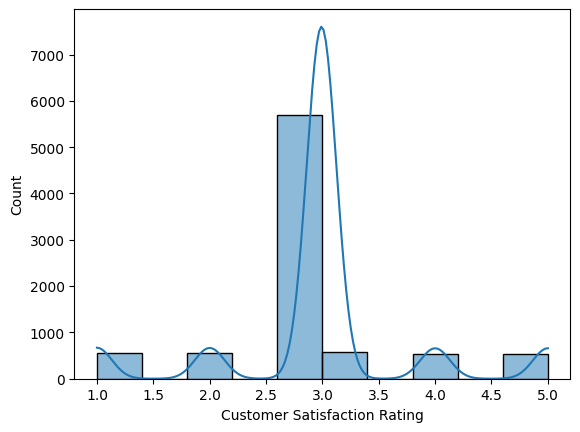

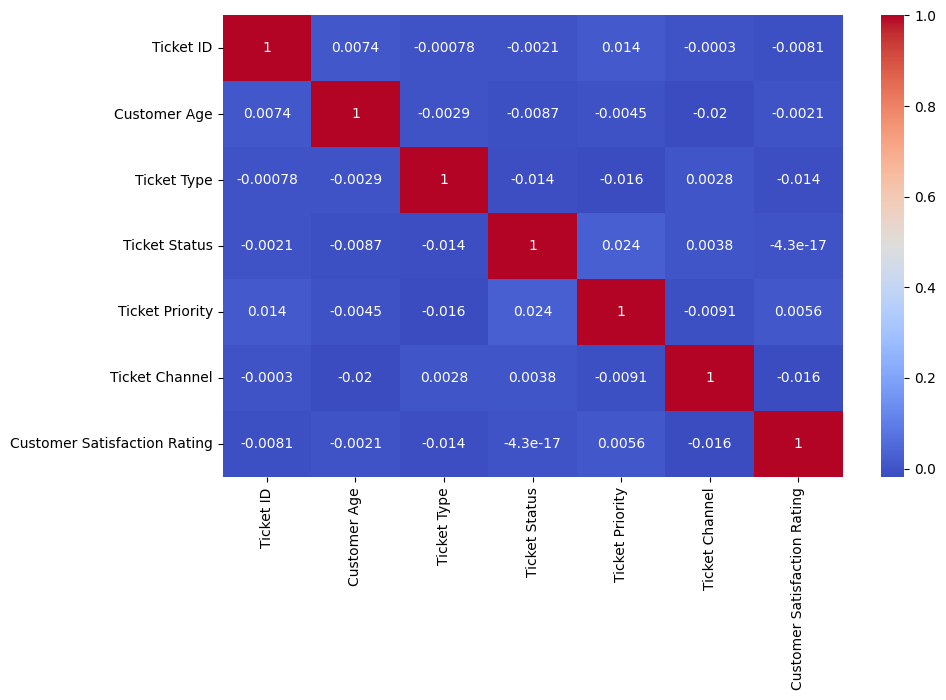

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Drop non-numeric columns before correlation
numeric_df = df.select_dtypes(include=['number'])

# Distribution of customer satisfaction
sns.histplot(df['Customer Satisfaction Rating'].dropna(), bins=10, kde=True)
plt.show()

# Correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [7]:
# Extract day of the week from Date of Purchase
df['Purchase Day'] = df['Date of Purchase'].dt.dayofweek.fillna(-1)

In [8]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Customer Satisfaction Rating'])
y = df['Customer Satisfaction Rating']

# Convert categorical columns to one-hot encoding
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Ensure no non-numeric values in training data
X_train = X_train.apply(pd.to_numeric, errors='coerce').fillna(0)
X_test = X_test.apply(pd.to_numeric, errors='coerce').fillna(0)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 0.459006883001761


In [10]:
import joblib
joblib.dump(model, "customer_satisfaction_model.pkl")

['customer_satisfaction_model.pkl']

In [11]:
import os 
print(os.getcwd())

C:\Users\grees\INTERNSHIP\CUSTOMER SATISFACTION PREDICTION
